# 00. Table of Content
### 01. Import Libraries & Datasets
### 02. Data Cleaning
### 03. Data Prep for Regression Analysis
### 04. Regression Analysis

# 01. Importing Libraries & Datasets

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
# Charts are displayed in notebook without the need to "call" them specifically.
%matplotlib inline

In [9]:
# Create path
path = r'C:\Users\krist\21.02.2024 World Happiness Report Analysis'

In [10]:
# Import D1
d1_full = pd.read_csv(os.path.join(path, '02 Data', 'Sourced Data', 'd1_full_score_data (2005-2022).csv'), index_col = False)

# 02. Data Cleaning

In [11]:
d1_full.head()

,country name,year,life Ladder,log GDP per capita,social support,healthy life expectancy at birth,freedom to make life choices,generosity,perceptions of corruption,positive affect,negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.191,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.121,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.238,0.776,0.614,0.268


In [12]:
d1_full.shape

(2199, 11)

Disclaimer: While the datasets has more than 5000 observations, only looking at two variables in the linear regression doesn't pass the 5000 observation requirement for data modeling. With more world happiness reports to come this threshold will be surpassed soon though, so this analysis can be repeated.

### Missing values

In [13]:
# Reminder: Missing values due to inconsistent participation of countries and missing poll questions in certain countries
d1_full.isnull().sum()

country name                          0
year                                  0
life Ladder                           0
log GDP per capita                   20
social support                       13
healthy life expectancy at birth     54
freedom to make life choices         33
generosity                           73
perceptions of corruption           116
positive affect                      24
negative affect                      16
dtype: int64

In [24]:
d1_full = d1_full.dropna()

In [25]:
d1_full.isnull().sum()

country name                        0
year                                0
life Ladder                         0
log GDP per capita                  0
social support                      0
healthy life expectancy at birth    0
freedom to make life choices        0
generosity                          0
perceptions of corruption           0
positive affect                     0
negative affect                     0
dtype: int64

### Duplicates

In [26]:
dups_1 = d1_full.duplicated()

In [27]:
dups_1.shape
# No dups

(1958,)

### Extreme Values Check

#### Social Support

C:\Users\krist\AppData\Local\Temp\ipykernel_170120\3858137475.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d1_full['social support'], bins=25) # Shows extreme values
C:\Users\krist\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='social support', ylabel='Density'>

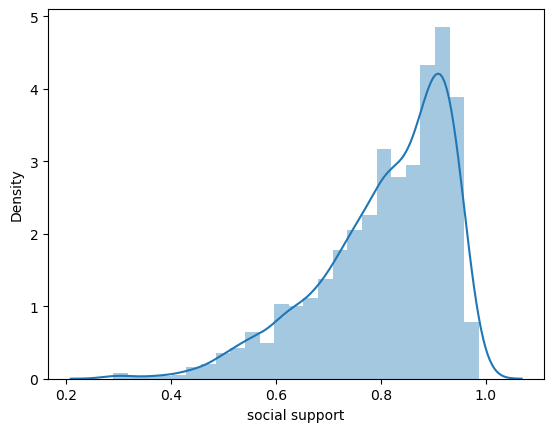

In [28]:
# Check for 'social support'
sns.distplot(d1_full['social support'], bins=25) # Shows extreme values
# No extreme outliers

#### Freedom to make Life choices
#### Hypothesis: The higher the freedom to make life choices score the higher the ladder score

C:\Users\krist\AppData\Local\Temp\ipykernel_170120\987761277.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d1_full['freedom to make life choices'], bins=25) # Shows extreme values
C:\Users\krist\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='freedom to make life choices', ylabel='Density'>

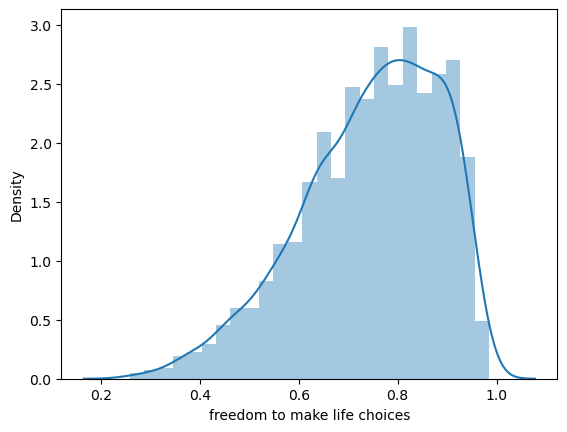

In [29]:
# Check for 'freedom to make life choices'
sns.distplot(d1_full['freedom to make life choices'], bins=25) # Shows extreme values
# No extreme outliers

#### Perceptions of Corruption
#### Hypothesis: The lower the perceptions of corruption score the higher the ladder score

C:\Users\krist\AppData\Local\Temp\ipykernel_170120\2824404960.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d1_full['perceptions of corruption'], bins=25) # Shows extreme values
C:\Users\krist\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='perceptions of corruption', ylabel='Density'>

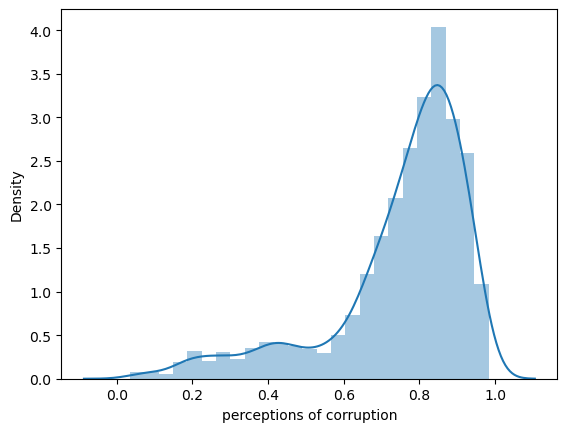

In [30]:
# Check for 'perceptions of corruption'
sns.distplot(d1_full['perceptions of corruption'], bins=25) # Shows extreme values
# Possible outliers

In [31]:
d1_full['perceptions of corruption'].mean() # Check the mean

0.7479458631256385

In [32]:
d1_full['perceptions of corruption'].median() # Check the median

0.802

In [33]:
d1_full['perceptions of corruption'].max() # Check the max

0.983

# 03. Data Prep for Regression Analysis

#### Social Support
#### Hypothesis: The higher the social support score the higher the ladder score

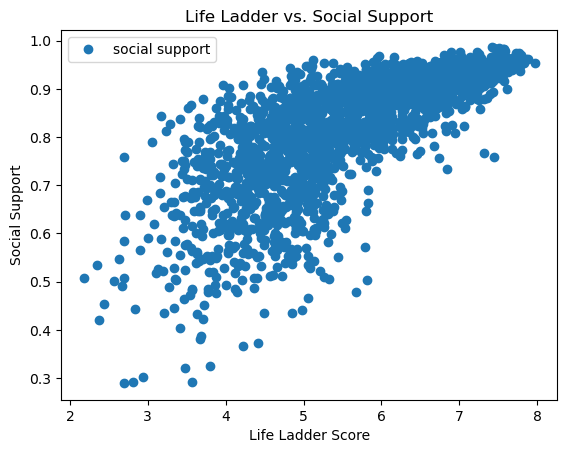

In [39]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

d1_full.plot(x = 'life Ladder', y='social support',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Life Ladder vs. Social Support')  
plt.xlabel('Life Ladder Score')  
plt.ylabel('Social Support')  
plt.show()

#### Freedom to make Life choices

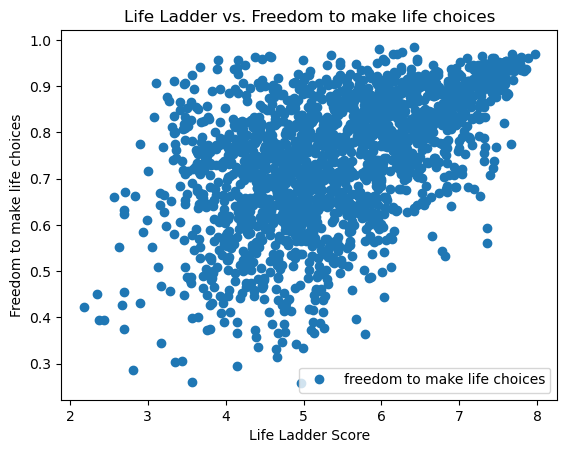

In [40]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

d1_full.plot(x = 'life Ladder', y='freedom to make life choices',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Life Ladder vs. Freedom to make life choices')  
plt.xlabel('Life Ladder Score')  
plt.ylabel('Freedom to make life choices')  
plt.show()

#### Perceptions of corruption

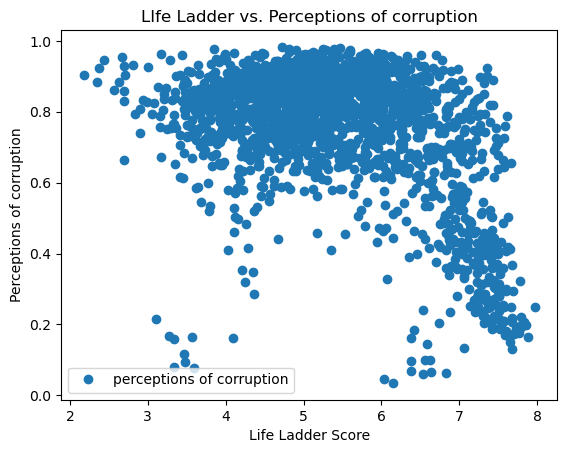

In [41]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

d1_full.plot(x = 'life Ladder', y='perceptions of corruption',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('LIfe Ladder vs. Perceptions of corruption')  
plt.xlabel('Life Ladder Score')  
plt.ylabel('Perceptions of corruption')  
plt.show()

#### Social Support

In [42]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = d1_full['life Ladder'].values.reshape(-1,1)
y = d1_full['social support'].values.reshape(-1,1)

In [43]:
X

array([[3.724],
       [4.402],
       [4.758],
       ...,
       [3.16 ],
       [3.155],
       [3.296]])

In [44]:
y

array([[0.451],
       [0.552],
       [0.539],
       ...,
       [0.717],
       [0.685],
       [0.666]])

In [45]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Freedom to make Life choices

In [46]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X1 = d1_full['life Ladder'].values.reshape(-1,1)
y1 = d1_full['freedom to make life choices'].values.reshape(-1,1)

In [47]:
X1

array([[3.724],
       [4.402],
       [4.758],
       ...,
       [3.16 ],
       [3.155],
       [3.296]])

In [48]:
y1

array([[0.718],
       [0.679],
       [0.6  ],
       ...,
       [0.643],
       [0.668],
       [0.652]])

In [49]:
# Split data into a training set and a test set.

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

#### Perceptions of corruption

In [50]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X2 = d1_full['life Ladder'].values.reshape(-1,1)
y2 = d1_full['perceptions of corruption'].values.reshape(-1,1)

In [51]:
X2

array([[3.724],
       [4.402],
       [4.758],
       ...,
       [3.16 ],
       [3.155],
       [3.296]])

In [52]:
y2

array([[0.882],
       [0.85 ],
       [0.707],
       ...,
       [0.789],
       [0.757],
       [0.753]])

In [53]:
# Split data into a training set and a test set.

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

# 04. Regression Analysis

#### Social Support

In [54]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [55]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [56]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

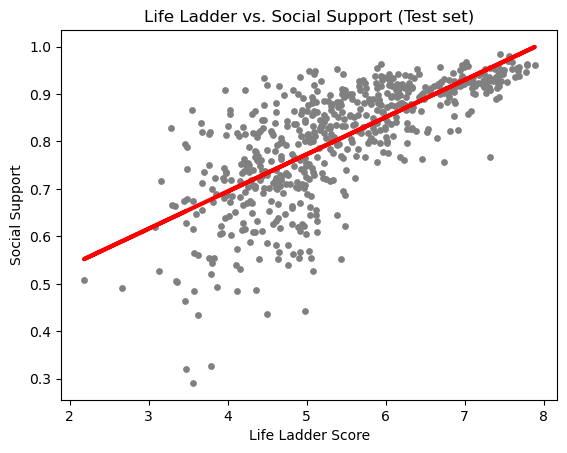

In [57]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Life Ladder vs. Social Support (Test set)')
plot_test.xlabel('Life Ladder Score')
plot_test.ylabel('Social Support')
plot_test.show()

In [58]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [59]:
# Print the model summary statistics to evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.07837413]]
Mean squared error:  0.007372998901425271
R2 score:  0.5138662782279777


Social Support

Positive Slope of trend line - model suggests, the higher the social support score the higher the ladder score.
MSE (Estimator that measures the avg. squared difference between estimated and true values) - 0.0073 is moderate considering the variation of the social support score (~0-~1)
R2 score (Metric that indicates how well the model explains the variance of the data. Number usually between 0 and 1, where values closer to 0 indicate a poor fit and values closer to 1 indicate a good fit.  - 0.51 indicates a medium fit that is not good enough for proper prediction

In [60]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.606,0.686681
1,0.680,0.691070
2,0.928,0.855656
3,0.822,0.727044
4,0.812,0.780966
5,0.507,0.551878
6,0.924,0.874544
7,0.864,0.759961
8,0.760,0.727279
9,0.819,0.780574


In [61]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [62]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [63]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.07837413]]
Mean squared error:  0.007228889134430192
R2 score:  0.5262444449965873


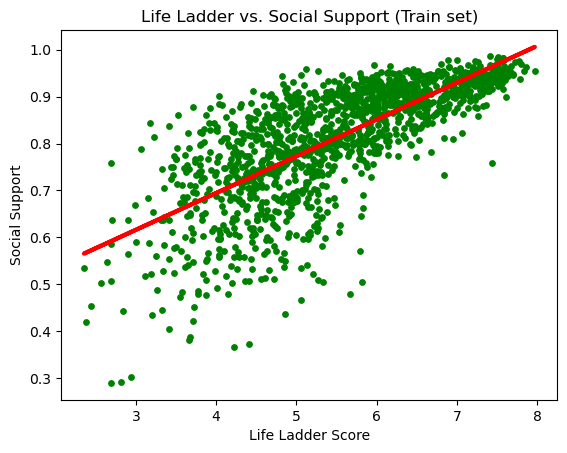

In [64]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Life Ladder vs. Social Support (Train set)')
plot_test.xlabel('Life Ladder Score')
plot_test.ylabel('Social Support')
plot_test.show()

Model is not over-fitted but only shows slightly higher R2 score on the train set. The relationship between Social Support and Ladder Score is not purely linear. The Hypothesis 'The higher the social support, the higher the ladder score' is only partially true. There is a lot of variance that can't be explained by the linear relationship between the variables.  

#### Freedom to make Life choices

In [72]:
# Create a regression_1 object.

regression_1 = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [73]:
# Fit the regression_1 object onto the training set.

regression_1.fit(X1_train, y1_train)

LinearRegression()

In [74]:
# Predict the values of y1 using X1.

y1_predicted = regression_1.predict(X1_test)

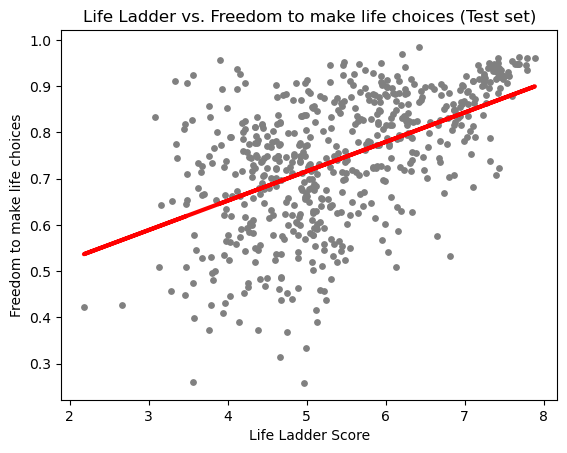

In [75]:
# Create a plot that shows the regression line from the model on the test set.

plot_test_1 = plt
plot_test_1.scatter(X1_test, y1_test, color='gray', s = 15)
plot_test_1.plot(X1_test, y1_predicted, color='red', linewidth =3)
plot_test_1.title('Life Ladder vs. Freedom to make life choices (Test set)')
plot_test_1.xlabel('Life Ladder Score')
plot_test_1.ylabel('Freedom to make life choices')
plot_test_1.show()

In [76]:
# Create objects that contain the model summary statistics.

rmse_1 = mean_squared_error(y1_test, y1_predicted) # This is the mean squared error
r2_1 = r2_score(y1_test, y1_predicted) # This is the R2 score. 

In [77]:
# Print the model summary statistics to evaluate the performance of the model.

print('Slope:' ,regression_1.coef_)
print('Mean squared error: ', rmse_1)
print('R2 score: ', r2_1)

Slope: [[0.06357191]]
Mean squared error:  0.014631942253386182
R2 score:  0.2951672071486987


Freedom to make life choices

Positive Slope of trend line - model suggests, the higher the freedom to make life choices score the higher the ladder score.
MSE (Estimator that measures the avg. squared difference between estimated and true values) - 0.01 is higher than for the social support metric and moderate considering the variation of the ftmlc score (~0-~1)
R2 score (Metric that indicates how well the model explains the variance of the data. Number usually between 0 and 1, where values closer to 0 indicate a poor fit and values closer to 1 indicate a good fit) - 0.29 indicates a poor fit that is not good enough for proper prediction

In [78]:
# Create a dataframe comparing the actual and predicted values of y.

data_1 = pd.DataFrame({'Actual': y1_test.flatten(), 'Predicted': y1_predicted.flatten()})
data_1.head(30)

,Actual,Predicted
0,0.956,0.645940
1,0.726,0.649500
2,0.817,0.783001
3,0.556,0.678680
4,0.554,0.722417
5,0.423,0.536596
6,0.825,0.798322
7,0.754,0.705380
8,0.736,0.678870
9,0.676,0.722099


In [79]:
# Predict.

y1_predicted_train = regression_1.predict(X1_train) # This is predicting X1_train!

In [80]:
rmse_1 = mean_squared_error(y1_train, y1_predicted_train)
r2_1 = r2_score(y1_train, y1_predicted_train)

In [81]:
print('Slope:' ,regression_1.coef_)
print('Mean squared error: ', rmse_1)
print('R2 score: ', r2_1)

Slope: [[0.06357191]]
Mean squared error:  0.014004160421076927
R2 score:  0.2739170290126799


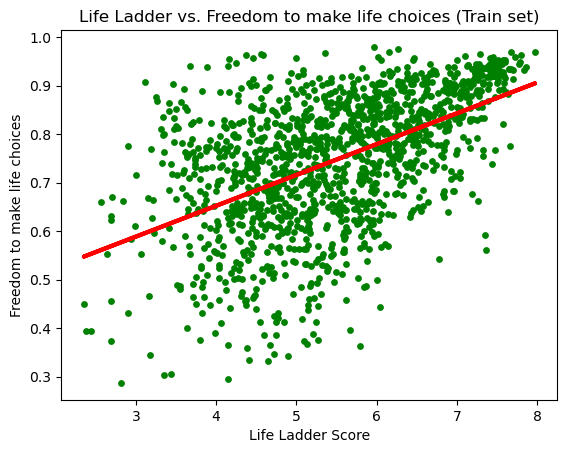

In [82]:
# Visualizing the training set results.

plot_test_1 = plt
plot_test_1.scatter(X1_train, y1_train, color='green', s = 15)
plot_test_1.plot(X1_train, y1_predicted_train, color='red', linewidth =3)
plot_test_1.title('Life Ladder vs. Freedom to make life choices (Train set)')
plot_test_1.xlabel('Life Ladder Score')
plot_test_1.ylabel('Freedom to make life choices')
plot_test_1.show()

Model is not over-fitted but shows even lower R2 score on the train set. The relationship between Freedom to make life choices and Ladder Score is not purely linear. The Hypothesis 'The higher the freedom to make life choices score, the higher the ladder score' is only partially true. There is a lot of variance that can't be explained by the linear relationship between the variables.

#### Perceptions of corruption

In [83]:
# Create a regression_2 object.

regression_2 = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [84]:
# Fit the regression_2 object onto the training set.

regression_2.fit(X2_train, y2_train)

LinearRegression()

In [85]:
# Predict the values of y2 using X2.

y2_predicted = regression_2.predict(X2_test)

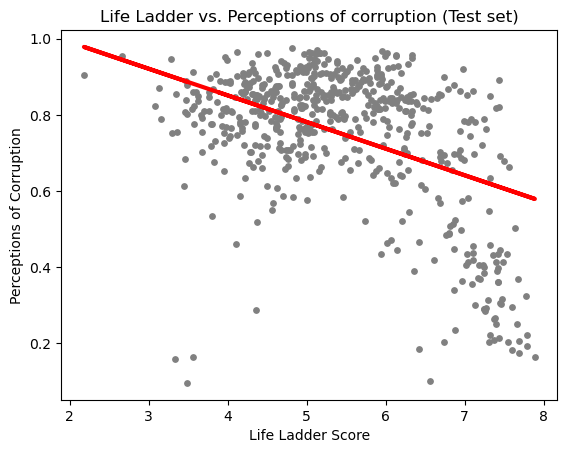

In [86]:
# Create a plot that shows the regression line from the model on the test set.

plot_test_2 = plt
plot_test_2.scatter(X2_test, y2_test, color='gray', s = 15)
plot_test_2.plot(X2_test, y2_predicted, color='red', linewidth =3)
plot_test_2.title('Life Ladder vs. Perceptions of corruption (Test set)')
plot_test_2.xlabel('Life Ladder Score')
plot_test_2.ylabel('Perceptions of Corruption')
plot_test_2.show()

In [87]:
# Create objects that contain the model summary statistics.

rmse_2 = mean_squared_error(y2_test, y2_predicted) # This is the mean squared error
r2_2 = r2_score(y2_test, y2_predicted) # This is the R2 score. 

In [88]:
# Print the model summary statistics to evaluate the performance of the model.

print('Slope:' ,regression_2.coef_)
print('Mean squared error: ', rmse_2)
print('R2 score: ', r2_2)

Slope: [[-0.0700023]]
Mean squared error:  0.026541110433578954
R2 score:  0.23599582880154713


Perceptions of Corruption

Negative Slope of trend line - model suggests, the higher the perceptions of corruption score the lower the ladder score.
MSE (Estimator that measures the avg. squared difference between estimated and true values) - 0.02 is higher than for the previously tested metrics but still moderate considering the variation of the poc score (~0-~1)
R2 score (Metric that indicates how well the model explains the variance of the data. Number usually between 0 and 1, where values closer to 0 indicate a poor fit and values closer to 1 indicate a good fit.)  - 0.23 indicates a poor fit that is not good enough for proper prediction.

In [89]:
# Create a dataframe comparing the actual and predicted values of y.

data_2 = pd.DataFrame({'Actual': y2_test.flatten(), 'Predicted': y2_predicted.flatten()})
data_2.head(30)

,Actual,Predicted
0,0.890,0.858138
1,0.752,0.854217
2,0.844,0.707213
3,0.814,0.822086
4,0.926,0.773925
5,0.905,0.978542
6,0.544,0.690342
7,0.846,0.792685
8,0.805,0.821876
9,0.826,0.774275


In [90]:
# Predict.

y2_predicted_train = regression_2.predict(X2_train) # This is predicting X2_train!

In [91]:
rmse_2 = mean_squared_error(y2_train, y2_predicted_train)
r2_2 = r2_score(y2_train, y2_predicted_train)

In [92]:
print('Slope:' ,regression_2.coef_)
print('Mean squared error: ', rmse_2)
print('R2 score: ', r2_2)

Slope: [[-0.0700023]]
Mean squared error:  0.027604802796796373
R2 score:  0.18835087063688083


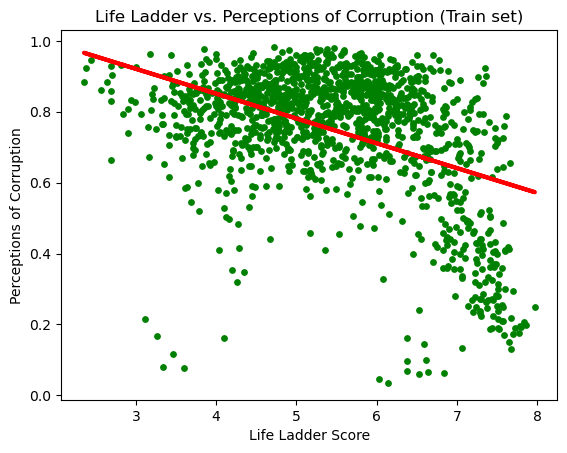

In [93]:
# Visualizing the training set results.

plot_test_2 = plt
plot_test_2.scatter(X2_train, y2_train, color='green', s = 15)
plot_test_2.plot(X2_train, y2_predicted_train, color='red', linewidth =3)
plot_test_2.title('Life Ladder vs. Perceptions of Corruption (Train set)')
plot_test_2.xlabel('Life Ladder Score')
plot_test_2.ylabel('Perceptions of Corruption')
plot_test_2.show()

Model is not over-fitted but shows even lower R2 score on the train set. The relationship between Perceptions of Corruption and Ladder Score is not purely linear. The Hypothesis 'The higher the perceptions of corruption score, the lower the ladder score' is only partially true in this model. There is a lot of variance that can't be explained by the linear relationship between the variables.

Tests confirm that the key variables show a positive/negative relationship but not a purely linear one and can't be singled out to explain the overall happiness scores (life ladder scores).